<div align="center"><a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Automatizacion/Automatizacion1_2daCursada2022.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg'/> </a> <br> Recordá abrir en una nueva pestaña </div>

## **Automatización**

En esta clase:

- Aprenderemos sobre programar desde una carpeta, o **directorio de trabajo**, y las una rutas o _path_ relativos, o absolutos.
- Veremos como buscar archivos, también listar, borrar, copiar, mover y otras operaciones usuales con el sistema operativo. Librerías os, glob, shutil
- Lectura de distintos tipos de datos: .sav, .dta, .csv, .zip

Actualmente cualquier tarea que uno se proponga automatizar, así lo es. Podemos encontrar un espectro de complejidad:

- Por un lado, con la librería *pyautogui* podemos automatizar movimientos de mouse y teclado. Esto da la posibilidad de automatizar tareas sencillas de una manera directa.

(El siguiente ejemplo anda solo corriendolo como local!)

### **Preámbulo**
Capas de automatización 



| Protocolo              | Web Scraping     | Modificación directa  |
|------------------------|------------------|-----------------------|
| (sist operativo, APIs) | (Beautiful Soup) | (Selenium, PyAutoGui) |
| <img src= 'https://computersciencewiki.org/images/b/bc/Api.png' width="250" >                       | <img src='https://miro.medium.com/max/1400/0*5l1YDbdnkWmQwDU5.jpg' width="300">| <img src= 'https://content.instructables.com/ORIG/FMK/ZVQB/K30YGGRH/FMKZVQBK30YGGRH.jpg?auto=webp&frame=1&width=320&md=bf737a2a1d3f721c6f7ed2c33323f3cb' width="250">                      |
| Más robusto            |          ->        | Menos robusto         |


## **PyAutoGui**
### (es neceario correrlo en local)

```python
# Devuelve las dimensiones de la pantalla
ancho, alto = pyautogui.size()
# Devuelve la posición actual
Xactual, Yactual = pyautogui.position()
# Mover a coordenadas (pixels)
pyautogui.moveTo(100, 150) 
# Clickear
pyautogui.click() 
# Tipear con delay
pyautogui.write('Hello world!', interval=0.25)  
# Apretar una tecla
pyautogui.press('esc') 
pyautogui.hotkey('ctrl', 'c')
pyautogui.locateOnScreen()
```

***Nota: Lamentablemente pyautogui es lo único incluido en cualquiera de nuestros cursos que no funciona en Colab! Para ejecutar esta sección instalar Anaconda en la computadora local***

In [57]:
# !pip install pyautogui

In [58]:
from time import sleep
import os
import pyautogui as pygui
import numpy as np

In [59]:
# def cuadrado(l):
#     pygui.drag(l, 0, duration=1)
#     pygui.drag(0, l, duration=1)
#     pygui.drag(-l, 0, duration=1)
#     pygui.drag(0, -l, duration=1)

In [60]:
# cuadrado(200)

In [61]:
# url = r'https://www.lanacion.com.ar/'

# sleep(2)
# pygui.hotkey('ctrl', 't')
# sleep(2)
# pygui.write(url)
# sleep(2)
# pygui.press('enter')

In [62]:
# def abrir_paint():
#     # Windows
#     os.system('start mspaint.exe')
#     sleep(1)
#     S = pygui.size()
#     pygui.moveTo(S[0]//2, S[1]//2)

In [63]:
# def cuadrado_espiral(l, ratio=0.9):
#     pygui.move(-l//2, -l//2, duration=0.1)
#     for i in range(50):
#         l = l*ratio
#         pygui.drag(l, 0, duration=0.1)
#         l = l*ratio
#         pygui.drag(0, l, duration=0.1)
#         l = l*ratio
#         pygui.drag(-l, 0, duration=0.1)
#         l = l*ratio
#         pygui.drag(0, -l, duration=0.1)
#         if l < 5:
#             break

In [64]:
# sleep(2)
# abrir_paint()
# cuadrado_espiral(600)

Ocasionalmente hay algunos casos de uso, pero encontramos obstáculos:

- Frágil ante cambios
- Método bruto, ad hoc
- Solo tareas sencillas

Encontraremos el mismo dilema más adelante en _web scraping_, en un extremo el consumo de APIs y en otro la automatización del navegador.

## **Bash y OS**

### Interactuando con el Sistema Operativo

In [65]:
# Con ! enviamos un comando a la terminal del sistema operativo
!pwd

/home/antonio/git-ml/data-science-path/0.6-automatizacion


In [66]:
!ls

automatizacion_pygui_bash_os.ipynb  Expo_2021.zip  nueva_carpeta  todos.csv


Algunos comandos a saber:

- pwd : "print working directory"
- ls: listar directorio actual
- wget: para descargar archivos 

In [67]:
# http://microdatos.dane.gov.co/index.php/catalog/472/get_microdata
!wget -O Expo_2021.zip https://unket.s3.sa-east-1.amazonaws.com/data/Expo_2021.zip

--2024-11-04 21:01:49--  https://unket.s3.sa-east-1.amazonaws.com/data/Expo_2021.zip
Resolviendo unket.s3.sa-east-1.amazonaws.com (unket.s3.sa-east-1.amazonaws.com)... 3.5.233.171, 52.95.165.114, 16.12.0.30, ...
Conectando con unket.s3.sa-east-1.amazonaws.com (unket.s3.sa-east-1.amazonaws.com)[3.5.233.171]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 58863328 (56M) [application/zip]
Guardando como: ‘Expo_2021.zip’

Expo_2021.zip       100%[===================>]  56,14M  18,0MB/s    en 3,1s    

2024-11-04 21:01:53 (18,0 MB/s) - ‘Expo_2021.zip’ guardado [58863328/58863328]



In [68]:
!pwd

/home/antonio/git-ml/data-science-path/0.6-automatizacion


### **Librería OS**

In [69]:
import os

#### Algunos comando de interés

```python
#Devuelve el "current working directory", o directorio actual de trabajo
os.getcwd() 

#Es por "change directory", o sea cambiar el directorio actual de trabajo
os.chdir(path)

#recorre recursivamente el árbol de directorios, empezando por el path. 
#en cada iteracion devuelve carpeta, [subcarpetas], [archivos]
os.walk(path)

#crea un directorio
os.makedirs(path)

#chequea si existe un path
os.path.exists(path)

#borra un archivo o carpeta vacia
os.remove(path)

#enumera el contenido del path
os.listdir(path)

#permite cambiar paths, nombres y extensiones
os.rename(path, new_path)

# Devuelve la ruta absoluta de una ruta relativa
os.path.abspath(path)

```

In [70]:
os.getcwd()

'/home/antonio/git-ml/data-science-path/0.6-automatizacion'

In [71]:
os.chdir('/home/antonio/git-ml/data-science-path/0.6-automatizacion')

In [72]:
os.getcwd()

'/home/antonio/git-ml/data-science-path/0.6-automatizacion'

In [73]:
# Carpeta actual
carpeta_actual = os.getcwd()
carpeta_actual
carpeta_actual.split('/')

['', 'home', 'antonio', 'git-ml', 'data-science-path', '0.6-automatizacion']

Cuatro maneras de listar la carpeta actual

In [74]:
# Con la terminal
!ls

automatizacion_pygui_bash_os.ipynb  Expo_2021.zip  nueva_carpeta  todos.csv


In [75]:
!dir

automatizacion_pygui_bash_os.ipynb  Expo_2021.zip  nueva_carpeta  todos.csv


In [76]:
# Con Python
# ruta relativa

os.listdir('.') # El '.' es la carpeta actual

['automatizacion_pygui_bash_os.ipynb',
 'todos.csv',
 'nueva_carpeta',
 'Expo_2021.zip']

In [77]:
# Con Python
# ruta absoluta
ruta_absoluta  = os.getcwd()
print(f'La ruta absoluta es: {ruta_absoluta}\n')
print('Contiene los siguientes archivos:')
os.listdir(os.getcwd())

La ruta absoluta es: /home/antonio/git-ml/data-science-path/0.6-automatizacion

Contiene los siguientes archivos:


['automatizacion_pygui_bash_os.ipynb',
 'todos.csv',
 'nueva_carpeta',
 'Expo_2021.zip']

Tres maneras de ver el directorio actual de trabajo

In [78]:
# 1.
os.getcwd()

'/home/antonio/git-ml/data-science-path/0.6-automatizacion'

In [79]:
# 2.
!pwd

/home/antonio/git-ml/data-science-path/0.6-automatizacion


In [80]:
# 3.
os.path.abspath('.')

'/home/antonio/git-ml/data-science-path/0.6-automatizacion'

Ejercicio

Crear una carpeta nueva con la función ```os.makedirs()```. Recibe simplemente la ruta a la carpeta a crear

In [81]:
# Recomendacion: Primro ver en que carpeta me encuentro
!ls

automatizacion_pygui_bash_os.ipynb  Expo_2021.zip  nueva_carpeta  todos.csv


In [82]:
os.chdir('/home/antonio/git-ml/data-science-path/0.6-automatizacion')

!pwd

/home/antonio/git-ml/data-science-path/0.6-automatizacion


In [83]:
os.getcwd()

'/home/antonio/git-ml/data-science-path/0.6-automatizacion'

In [84]:
# #@title Respuesta
# new_dir = 'nueva_carpeta'
# os.makedirs(new_dir)


Ejercicio:

Cambiar el directorio de trabajo a 'new_dir' usando os.chdir

In [85]:
#@title Respuesta
os.chdir('/home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta')
print('Ahora estamos en:', os.getcwd())


Ahora estamos en: /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta


In [86]:
# # Creamos un archivo
# with open("prueba.txt","w+") as archivo:
#   archivo.write('Hola mundo!')

# # Leemos el archivo
# with open('prueba.txt', 'r') as f:
#   print(f.read())

aqui

In [87]:
os.chdir('/home/antonio/git-ml/data-science-path/0.6-automatizacion')

In [88]:
!pwd

/home/antonio/git-ml/data-science-path/0.6-automatizacion


In [89]:
import zipfile

# Extraemos en la nueva carpeta
with zipfile.ZipFile('./Expo_2021.zip', "r") as zip_ref:
    zip_ref.extractall('./nueva_carpeta')   

Buscamos todos los .zip

In [90]:
os.listdir('./nueva_carpeta/Expo_2021/')

['Febrero.zip',
 'Noviembre.zip',
 'Octubre.zip',
 'Enero.zip',
 'Abril.zip',
 'Julio.zip',
 'csv_2021',
 'Junio.zip',
 'Septiembre.zip',
 'Diciembre.zip',
 'Marzo.zip',
 'Mayo.zip',
 'Agosto.zip']

In [91]:
for elemento in os.listdir('./nueva_carpeta/Expo_2021/'):  
    if elemento.endswith('.zip'):
        print(elemento)

Febrero.zip
Noviembre.zip
Octubre.zip
Enero.zip
Abril.zip
Julio.zip
Junio.zip
Septiembre.zip
Diciembre.zip
Marzo.zip
Mayo.zip
Agosto.zip


Ahora usando glob

In [92]:
from glob import glob

In [93]:
# ruta con todos los archivos
datos_path = './nueva_carpeta/Expo_2021/' 

In [94]:
zip_files = glob(datos_path + '/*.zip')
zip_files

['./nueva_carpeta/Expo_2021/Febrero.zip',
 './nueva_carpeta/Expo_2021/Noviembre.zip',
 './nueva_carpeta/Expo_2021/Octubre.zip',
 './nueva_carpeta/Expo_2021/Enero.zip',
 './nueva_carpeta/Expo_2021/Abril.zip',
 './nueva_carpeta/Expo_2021/Julio.zip',
 './nueva_carpeta/Expo_2021/Junio.zip',
 './nueva_carpeta/Expo_2021/Septiembre.zip',
 './nueva_carpeta/Expo_2021/Diciembre.zip',
 './nueva_carpeta/Expo_2021/Marzo.zip',
 './nueva_carpeta/Expo_2021/Mayo.zip',
 './nueva_carpeta/Expo_2021/Agosto.zip']

Hacemos un búcle para recorrer los archivos .zip y descomprimirlos en carpetas correspondientes

In [95]:
from time import sleep
# Recorremos la lista de zips
for f in zip_files:

    # Definimos el nombre de la nueva carpeta en una variable
    # Es la misma ruta "f" pero sin el ".zip"
    new_dir = f.replace('.zip', '')
    print(new_dir)

    # Extraemos en la nueva carpeta
    with zipfile.ZipFile(f, "r") as zip_ref:
        zip_ref.extractall(new_dir)
              
    sleep(0.5)

./nueva_carpeta/Expo_2021/Febrero
./nueva_carpeta/Expo_2021/Noviembre
./nueva_carpeta/Expo_2021/Octubre
./nueva_carpeta/Expo_2021/Enero
./nueva_carpeta/Expo_2021/Abril
./nueva_carpeta/Expo_2021/Julio
./nueva_carpeta/Expo_2021/Junio
./nueva_carpeta/Expo_2021/Septiembre
./nueva_carpeta/Expo_2021/Diciembre
./nueva_carpeta/Expo_2021/Marzo
./nueva_carpeta/Expo_2021/Mayo
./nueva_carpeta/Expo_2021/Agosto


In [96]:
# Vemos que ya estan los .zips, y carpetas correspondientes
os.listdir('./nueva_carpeta/Expo_2021/' )

['Febrero.zip',
 'Noviembre.zip',
 'Enero',
 'Septiembre',
 'Octubre.zip',
 'Enero.zip',
 'Abril.zip',
 'Mayo',
 'Junio',
 'Julio.zip',
 'Noviembre',
 'Octubre',
 'Marzo',
 'Abril',
 'csv_2021',
 'Junio.zip',
 'Septiembre.zip',
 'Diciembre.zip',
 'Julio',
 'Marzo.zip',
 'Agosto',
 'Diciembre',
 'Mayo.zip',
 'Agosto.zip',
 'Febrero']

La estructura queda así:

```
.
├── Expo_2021
│   ├── Abril
│   │   ├── Abril.csv
│   │   ├── Abril.dta
│   │   └── Abril.sav
│   ├── Abril2021.zip

...

│   ├── Octubre
│   │   ├── Octubre.csv
│   │   ├── Octubre.dta
│   │   └── Octubre.sav
│   ├── Octubre2021.zip
│   ├── Septiembre
│   │   ├── Septiembre.csv
│   │   ├── Septiembre.dta
│   │   └── Septiembre.sav
│   └── Septiembre2021.zip

```

In [97]:
# Buscamos los archivos del tipo que queremos usando glob
# Podemos cambiar el tipo cambiando la siguiente variable

# tipo = 'dta'
tipo = 'csv'
# tipo = 'sav'

In [98]:
datos_path = './nueva_carpeta/Expo_2021/' 


In [99]:
datos = glob(f'{datos_path}/*/*{tipo}') # Cualquier archivo .sav, de cualquiera de las carpetas internas
datos

['./nueva_carpeta/Expo_2021/Enero/Enero.csv',
 './nueva_carpeta/Expo_2021/Septiembre/Septiembre.csv',
 './nueva_carpeta/Expo_2021/Mayo/Mayo.csv',
 './nueva_carpeta/Expo_2021/Junio/Junio.csv',
 './nueva_carpeta/Expo_2021/Noviembre/Noviembre.csv',
 './nueva_carpeta/Expo_2021/Octubre/Octubre.csv',
 './nueva_carpeta/Expo_2021/Marzo/Marzo.csv',
 './nueva_carpeta/Expo_2021/Abril/Abril.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Septiembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Mayo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Marzo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Febrero.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Abril.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Noviembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Diciembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Agosto.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Julio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Junio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Octubre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Enero.csv',
 './nue

In [100]:
datos_path + tipo + '_2021'

'./nueva_carpeta/Expo_2021/csv_2021'

In [101]:
# Chequeamos si la carpeta ya existe, y si no creamos una carpeta para guardar todos archivos los de ese tipo 

if not os.path.exists(datos_path + '/' + tipo + '_2021'):
    os.mkdir(datos_path + tipo + '_2021')

In [102]:
# Vemos que se creó la carpeta "sav_2021"

!ls nueva_carpeta/Expo_2021

Abril	    Diciembre	   Febrero.zip	Marzo	   Noviembre.zip
Abril.zip   Diciembre.zip  Julio	Marzo.zip  Octubre
Agosto	    Enero	   Julio.zip	Mayo	   Octubre.zip
Agosto.zip  Enero.zip	   Junio	Mayo.zip   Septiembre
csv_2021    Febrero	   Junio.zip	Noviembre  Septiembre.zip


In [103]:
datos

['./nueva_carpeta/Expo_2021/Enero/Enero.csv',
 './nueva_carpeta/Expo_2021/Septiembre/Septiembre.csv',
 './nueva_carpeta/Expo_2021/Mayo/Mayo.csv',
 './nueva_carpeta/Expo_2021/Junio/Junio.csv',
 './nueva_carpeta/Expo_2021/Noviembre/Noviembre.csv',
 './nueva_carpeta/Expo_2021/Octubre/Octubre.csv',
 './nueva_carpeta/Expo_2021/Marzo/Marzo.csv',
 './nueva_carpeta/Expo_2021/Abril/Abril.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Septiembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Mayo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Marzo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Febrero.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Abril.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Noviembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Diciembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Agosto.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Julio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Junio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Octubre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Enero.csv',
 './nue

In [104]:
# Movemos todos los que los archivos de ese tipo a la nueva carpeta
# Podemos chequear si ya está en la carpeta con os.path.exists 

for d in datos:
    # Definimos en una variable cuál va a ser la nueva ruta
    new_path = datos_path + tipo + '_2021/' + d.replace('\\', '/').split('/')[-1] # El replace es para que funcione en windows y linux
    if not os.path.exists(new_path):
        os.rename(d, new_path)

In [105]:
new_path

'./nueva_carpeta/Expo_2021/csv_2021/Febrero.csv'

In [106]:
# Listamos los archivos dentro de la nueva carpeta

!ls {datos_path}/{tipo}_2021

Abril.csv      Enero.csv    Junio.csv  Noviembre.csv
Agosto.csv     Febrero.csv  Marzo.csv  Octubre.csv
Diciembre.csv  Julio.csv    Mayo.csv   Septiembre.csv


```
.
├── Expo_2021
│   ├── Abril2021
│   │   ├── Abril.csv
│   │   └── Abril.dta
│   ├── Abril2021.zip
│   ├── Agosto2021
│   │   ├── Agosto.csv

...

│   ├── Octubre2021
│   │   ├── Octubre 2021.csv
│   │   └── Octubre 2021.dta
│   ├── Octubre2021.zip
│   ├── sav_2021
│   │   ├── Abril.sav
│   │   ├── Agosto.sav
│   │   ├── Diciembre.sav
│   │   ├── Enero.sav
│   │   ├── Febrero.sav
│   │   ├── Julio.sav
│   │   ├── Junio.sav
│   │   ├── Marzo.sav
│   │   ├── Mayo.sav
│   │   ├── Noviembre 2021.sav
│   │   ├── Octubre 2021.sav
│   │   └── Septiembre.sav
│   ├── Septiembre2021
│   │   ├── Septiembre.csv
│   │   └── Septiembre.dta
│   └── Septiembre2021.zip
```

En dos casos puede ser necesario recurrir a otra librería, _shutil_

Estos casos son:

- copyfile: para copiar archivos
- rmtree: para borrar directorios

```python
from shutil import copyfile
copyfile(src, dst)
```

Usaremos esta 2da función para limpiar los archivos que extrajimos y no necesitamos

In [107]:
zip_files

['./nueva_carpeta/Expo_2021/Febrero.zip',
 './nueva_carpeta/Expo_2021/Noviembre.zip',
 './nueva_carpeta/Expo_2021/Octubre.zip',
 './nueva_carpeta/Expo_2021/Enero.zip',
 './nueva_carpeta/Expo_2021/Abril.zip',
 './nueva_carpeta/Expo_2021/Julio.zip',
 './nueva_carpeta/Expo_2021/Junio.zip',
 './nueva_carpeta/Expo_2021/Septiembre.zip',
 './nueva_carpeta/Expo_2021/Diciembre.zip',
 './nueva_carpeta/Expo_2021/Marzo.zip',
 './nueva_carpeta/Expo_2021/Mayo.zip',
 './nueva_carpeta/Expo_2021/Agosto.zip']

In [108]:
import shutil

# for f in zip_files:
    
#     # ¡CUIDADO!
#     # Estas funciones de borrar y renombrar son potencialmente peligrosas
#     # Antes de ejecutarlas con una ruta, pueden hacer un print para asegurarse de qué se haría
    
#     # Borramos las carpetas de más, para eso
#     # buscamos la ruta absoluta del zip. 
#     # Sabemos que carpeta donde se extrajo se llama igual pero sin .zip
#     zip_dir = os.path.abspath(f).split('.')[0]
#     print('Borrando...', zip_dir)

#     shutil.rmtree(zip_dir)

#     # Borramos también los .zip
#     os.remove(f)

for f in zip_files:
    # Obtenemos el nombre del directorio eliminando la extensión .zip
    zip_dir = os.path.splitext(os.path.abspath(f))[0]
    print('Borrando...', zip_dir)

    # Verificamos si el directorio existe antes de intentar eliminarlo
    if os.path.isdir(zip_dir):
        shutil.rmtree(zip_dir)

    else:
        print(f'Directorio no encontrado: {zip_dir}')

    
    # Verificamos si el archivo .zip existe antes de eliminarlo
    if os.path.isfile(f):
        os.remove(f)
    else:
        print(f"Archivo .zip no encontrado: {f}")


Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Febrero
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Noviembre
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Octubre
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Enero
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Abril
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Julio
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Junio
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Septiembre
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta/Expo_2021/Diciembre
Borrando... /home/antonio/git-ml/data-science-path/0.6-automatizacion/nueva_carpeta

In [109]:
# Nos queda solo la carpeta con todos los archivos del tipo elegido, ordenados

!ls {datos_path}

csv_2021


Cargamos los datos a un DataFrame

In [110]:
from glob import glob

rutas_datos = glob(datos_path + '/*/*' + tipo)
rutas_datos

['./nueva_carpeta/Expo_2021/csv_2021/Septiembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Mayo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Marzo.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Febrero.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Abril.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Noviembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Diciembre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Agosto.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Julio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Junio.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Octubre.csv',
 './nueva_carpeta/Expo_2021/csv_2021/Enero.csv']

Leemos 3 tipos de datos:
- Stata
- SPSS
- csv

In [111]:
# para stata o SPSS
# !pip install pyreadstat

In [112]:
import pandas as pd

datos = []

for r in rutas_datos:

    if tipo == 'dta':
        # En el caso de stata necesitamos instalar la siguiente librería
        import pyreadstat

        df, metadata = pyreadstat.read_dta(r)    

    elif tipo == 'sav':
        df = pd.read_spss(r)

    elif tipo == 'csv':
        df = pd.read_csv(r, delimiter = ',', encoding='ISO-8859-1', low_memory=False)

    else:
        print('Otro tipo!')

    datos.append(df)

dataframe_total = pd.concat(datos)
dataframe_total.to_csv('todos.csv')

In [113]:
dataframe_total.sample(3)

,FECH,ADUA,PAIS,COD_PAI4,COD_SAL1,COD_SAL,DPTO2,VIA,BANDERA,REGIM,...,PBK,PNK,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG,NIT,RAZ_SIAL
19625,2104,35,589,PER,35,BUN,11,1,472,1,...,32497.79,27081.93,102355.39,3.730997e+08,0.00,2075.0,0.0,0.0,890900535,KELLOGG DE COLOMBIA S.A.
1098,2103,3,149,CAN,3,BOG,5,4,149,1,...,9796.40,8306.50,59083.56,2.161320e+08,0.00,0.0,0.0,0.0,900514910,ESHKOL PREMIUM S.A.S
20138,2109,37,239,ECU,37,IPI,5,3,239,1,...,198.40,198.40,1035.65,3.908543e+06,909.51,0.0,0.0,0.0,800011207,SUMINISTRO MATERIAS COLORANTES S.A.


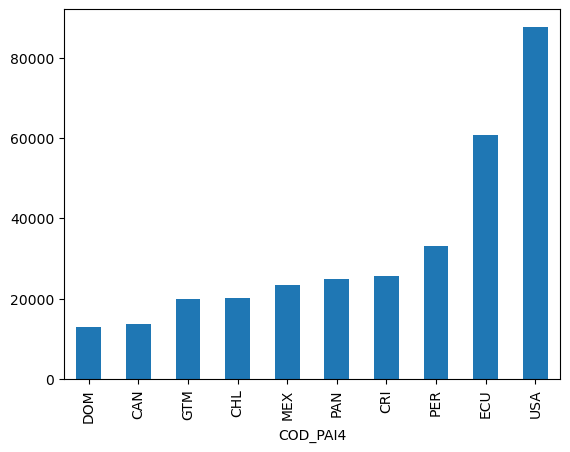

In [114]:
dataframe_total.groupby('COD_PAI4')\
  .count()['CANTI']   \
  .sort_values()      \
  .iloc[-10:]         \
  .plot.bar();

### Ejercicio GSheets

1) Tomar la siguiente lista de temas  
2) Crear una carpeta con su nombre en "title case"  
3) Dentro de cada carpeta, guardar los datos de tendencias para el día de hoy  

In [115]:
temas = ['Python', 'IA', 'Meditación', 'Jazz Rock', 'Sustentabilidad', 'Neurociencias']

La siguiente celda prepara y define una función _get_trends_ para buscar tendencias de Google. La misma recibe una búsqueda y devuelve un diccionario con los datos de las tendencias.

In [116]:
# !pip install pytrends

import pandas as pd                       
from pytrends.request import TrendReq

def get_trends(query):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=[query])
    df = pytrend.interest_by_region()
    return df.sort_values(query, ascending=False)[query].to_dict()

ModuleNotFoundError: No module named 'pytrends'

Ahora sí, recorrer la lista de temas y:

- Buscar las tendencias con la función get_trends
- Si no existe ya la carpeta para ese tema, crearla
- Crear un archivo .txt o .csv con los datos buscados dentro de esa carpeta

In [ ]:
# Ejemplo
query = 'IA'
tendencias = get_trends(query)
tendencias

In [ ]:
tendencias['Argentina']

In [ ]:
from datetime import datetime

fecha = datetime.now().strftime('%d-%m-%y')
fecha

In [ ]:
# for t in temas:
#     # completar

In [ ]:
#@title Respuesta
base = '/content/tendencias'
for tema in temas:
  tendencias = get_trends(tema)
  tema_dir = base + '/' + tema
  if not os.path.exists(tema_dir):
    os.makedirs(tema_dir)
    os.chdir(tema_dir)

    with open(f'{tema}.txt', 'w+') as f:
      f.write(str(tendencias))

# # Para probarlo
# with open('/content/tendencias/IA/IA.txt', 'r') as f:
#   print(f.read())

In [ ]:
with open('/content/tendencias/IA/IA.txt', 'r') as f:
  print(f.read())